## Ryan Gumpper - Classification Coding Exercise

First we need to load some initial libraries and the training/test data.

Once that is done, I like to get an idea of the dimensions of the data.

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

#Load training and test data
train_data = pd.read_csv('exercise_03_train.csv')
test_data = pd.read_csv('exercise_03_test.csv')

print(train_data.shape)
print(test_data.shape)


(40000, 101)
(10000, 100)


As expected, the training data contains an extra column for the dependent variable. Let's take a look at the first five rows of the training data to get a better idea and verify. I also, want to look at the test data as well.

In [2]:
train_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,83.812330,-0.122672,65.391785,6.323478,-18.511031,2.122648,0.319472,7.650422,7.713315,2.789856,3.161937,0.314606,-2.337769,0.346473,-0.034445,6.846460,-1.432359,-2.201084,-3.354706,-14.928499,-0.508166,18.000683,-7.417965,0.630054,-4.637193,-44.558764,11.845979,10.375184,-3.198000,-1.386096,9.219494,11.276351,-10.490478,-4.955304,Honda,wed,0.912923,1.447599,7.223553,6.345453,-12.853527,$229.47,-73.696118,-2.739030,23.206414,0.0%,-7.312450,4.036468,-1.269211,15.902179,25.264524,-19.944331,-8.155119,0.518441,-3.452840,3.477219,5.028244,-0.766853,0.970404,-6.553208,-1.694899,-37.704064,-8.675090,-16.294499,-1.664874,-2.099760,-0.223206,-2.428459,July,51.746057,34.344297,44.278620,-3.272041,-31.271870,-12.342707,-24.727017,-3.950582,-28.817173,-2.383631,54.853290,-21.780661,-2.542505,-5.802268,-56.498694,-9.580207,12.248465,7.674024,0.050937,5.913765,1.970939,-144.208496,5.482352,12.211997,asia,-3.201565,-9.837196,-21.092011,4.671140,0.588994,-11.417083,0
1,-0.445312,-0.436077,12.981759,30.716674,-34.981679,-16.712862,0.530105,8.740222,56.044533,0.075118,-37.992717,-0.165275,-3.566991,-0.509367,2.810061,-5.014334,-0.248782,3.993480,2.023831,-11.334563,-0.882649,-20.426731,-4.132525,-0.755783,-3.195466,27.074335,-0.122106,-19.731409,-0.587150,0.576996,5.362257,-18.287779,11.000913,-4.464928,Honda,wednesday,-1.909344,-22.820981,1.659441,1.335120,21.662360,$213.9,161.950929,14.230611,-170.533210,-0.0%,-1.900118,33.197063,0.669210,-17.165298,14.336000,-6.874649,-3.768920,-21.925943,2.834963,-6.932305,-11.479294,-4.539812,-1.717179,2.649737,0.940187,20.754071,-8.693321,-32.817709,-1.120819,8.802850,1.171086,3.023245,Jun,-220.595454,-2.385381,8.773979,-3.960816,-6.953864,-12.121296,13.857537,-23.018404,27.170559,-0.024138,-42.196071,8.335470,5.435904,-7.922957,77.412079,-5.405357,-4.513079,-2.398428,1.761859,-2.619810,-9.045592,148.348086,-6.083035,-5.098374,asia,5.433036,91.724841,4.305371,4.329130,0.371513,8.474528,0
2,82.927148,0.075277,-29.096012,-20.176841,10.109713,-45.994005,0.618132,7.757838,-69.749060,-1.561335,116.410969,0.192342,-7.645987,0.965640,1.074688,-3.301405,1.750239,7.658523,-3.546696,-18.506079,-0.614946,47.179031,5.215522,1.347929,0.744635,-31.950503,-4.809379,-27.861889,-0.054064,-1.557694,14.415605,3.122563,-0.635359,-10.421105,volkswagon,thurday,-3.131930,10.095960,-0.690880,2.504871,-4.413666,$2207.13,-105.242685,-7.087897,-81.760391,-0.02%,4.915974,-6.845058,-0.228783,-38.756694,11.879903,-71.294059,-2.889067,17.590918,2.893195,-10.295296,22.774447,-10.388426,-3.399829,-4.831446,17.547855,42.527355,-0.549690,24.086445,1.775456,10.185312,2.599926,-1.638474,Aug,123.476657,19.379312,-49.483866,26.352788,40.813441,19.715767,17.466146,-1.239946,-78.163037,-0.021548,-10.996892,40.412330,6.621187,-3.107994,23.844594,-7.680864,43.118893,7.351277,-0.375599,-8.408146,6.285944,-76.239072,0.200787,-7.174907,asia,2.595005,-14.630603,-3.743052,-14.820376,-2.366675,2.613091,0
3,370.736586,-0.263338,-75.273905,-21.765844,-72.478339,-8.701108,0.332586,2.769763,-35.815423,5.230400,126.279854,-0.120964,-4.147042,-0.560841,1.196674,0.094986,1.097013,-2.590958,5.693419,-41.960069,-0.161400,42.600594,-3.005460,1.021954,-2.027826,-12.732195,-8.854023,-30.366066,12.783482,1.943701,4.834265,-1.183167,0.671143,-5.032338,volkswagon,thurday,-4.322898,0.317175,-4.903652,4.701032,-45.327546,$82.09,-90.507566,-20.113745,-143.896780,-0.0%,-5.688367,32.806852,-1.695647,12.248845,-2.186258,32.133978,-7.229061,3.083700,0.477472,-1.552590,-0.791415,-23.025946,-3.282514,1.798865,2.303376,6.390344,-7.078124,-12.500280,0.489675,5.578700,1.687373,-5.466455,July,

In [3]:
test_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,120.252886,-0.170668,20.710224,-13.409410,-20.148997,18.649383,0.015563,0.799069,27.749853,0.457208,1.303670,0.518309,-3.541998,0.827510,-2.439269,17.130073,2.095122,-8.416516,2.426525,-2.357795,-0.196103,4.094550,1.966755,-1.227354,7.520205,77.158063,-15.200760,32.978344,5.960004,-0.140251,-0.044797,-0.554050,23.477165,-13.019712,Toyota,wed,0.994586,7.756120,-2.780489,0.611505,47.477817,$1251.44,-102.352794,31.569745,-338.300463,0.01%,-0.371676,7.982137,-3.636586,-0.878726,-20.160883,-22.596082,-7.610951,-26.755070,-0.378326,1.745079,-11.236853,-9.522726,-4.212189,5.406876,2.173530,60.742109,-5.046570,5.830773,-0.365000,-13.498735,2.506932,-0.655364,May,-347.082415,12.491419,-8.183898,-31.298288,-26.155737,-0.820886,1.769382,-3.200942,38.958304,-2.197368,6.987835,-7.195617,0.727288,14.073406,75.674698,8.840502,-11.232970,0.860149,5.333224,9.231668,-2.525725,-42.154991,-5.020444,0.142960,asia,12.202997,17.206558,-6.698424,10.669022,0.535953,0.794408
1,151.496163,-0.065142,-1.423250,9.250107,-58.582435,-3.730727,0.469421,2.994060,-74.308495,6.637583,33.384399,0.154858,-1.336561,0.152448,0.917624,-30.862604,-0.357345,-0.960836,0.589780,1.060362,-0.021947,9.149423,-25.104044,-0.204477,-0.900078,1.844679,-10.761931,33.479469,-3.898519,-1.620004,-3.583649,5.406482,-9.531959,3.163882,volkswagon,thurday,-4.233680,-24.632191,-11.369496,4.370336,3.742759,$37.89,-106.072606,-7.747847,-53.138956,0.0%,4.612344,5.747541,0.763917,18.246483,-2.458167,-36.239048,-1.485077,-8.802835,3.158079,-1.483103,2.496544,3.326367,-1.308534,3.381756,18.967836,2.045895,-7.405607,-17.635735,-2.126548,6.617978,0.230388,5.931537,July,-10.206057,5.693664,29.954987,15.221384,-34.303125,18.674866,6.026287,-8.592568,-33.309231,-2.782034,32.219470,-10.752222,-2.287523,-0.060643,18.101172,3.091556,-36.276825,4.863419,-0.932377,14.551690,1.392922,-98.797446,-2.605834,4.222651,asia,0.865352,-31.330463,9.030439,1.769777,-0.265219,-2.511831
2,-46.054317,-0.174997,9.167775,7.611975,-33.043372,-2.258558,-0.308114,-8.216299,-10.016635,-2.693126,32.869789,0.091869,-4.735019,-0.796092,-0.191319,-8.444534,-0.660962,-6.515557,-1.428438,-13.655225,-0.020870,21.904143,15.239767,0.177921,0.740297,-61.699705,-0.189140,3.346040,-8.362527,-1.801399,-10.917602,-11.839965,-7.694302,1.211869,volkswagon,wed,-0.127550,-2.334179,-0.888963,-4.032057,-10.202934,$-966.23,11.395019,-22.114796,-91.069706,0.0%,-1.832264,-16.881272,3.443549,13.292843,-2.666099,-81.329624,-2.289228,-2.518859,-4.856447,-2.914084,-12.349916,6.444469,-3.129148,2.181371,1.087896,-41.427027,-2.604316,-23.519823,-2.684299,17.887187,-1.285647,-0.150313,Aug,-18.788523,-12.252145,28.176259,-23.487423,-26.376173,-21.610168,-28.688488,2.056937,-56.338307,-1.441083,-23.317242,-10.947029,-7.084773,-4.108970,-7.320086,2.782341,18.717636,-3.613232,-0.521420,2.504835,-0.205401,-246.457481,-3.404679,-4.384774,asia,-7.693588,-12.767262,-8.578260,0.202378,-0.901658,0.340148
3,-7.784201,-0.201334,24.985110,21.561477,5.953458,9.298979,0.061949,-1.028978,-46.827620,3.482482,-4.801427,0.204767,-0.856432,-1.044174,0.283989,3.950462,-0.488190,-6.120801,2.764099,44.132370,-0.462994,-10.145124,7.130275,-2.118193,-5.970714,-16.426354,-11.345381,61.937759,-4.775653,0.645556,-3.683926,-26.445823,-17.187901,0.295868,Honda,thurday,4.846349,11.651534,-2.148938,4.264462,-49.873480,$35.49,154.459933,25.477243,-65.819788,0.02%,-7.869362,13.570006,0.713669,-2.260414,25.490311,17.838431,2.602972,19.727887,-0.143148,0.256942,-32.919141,-6.967590,0.210810,2.028853,-9.765286,51.193774,-12.381608,-8.498973,0.269599,-6.955194,0.297250,5.016182,Mar,-90.116472,30.211704,

You can see that we actually have unbalanced classes for the classification we are going to be doing. I will also take a look at precision and recall when looking at the models. Since the classes are a unbalanced, ROC AUC scores may not be the best option for model evaluation. However, it is still the main metric as this is how this dataset is going to be evaluated. Furthermore, this may lead me to believe that this is some type of fraud detection, but let's move on.

In [4]:
train_data['y'].describe()

count    40000.000000
mean         0.202200
std          0.401646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

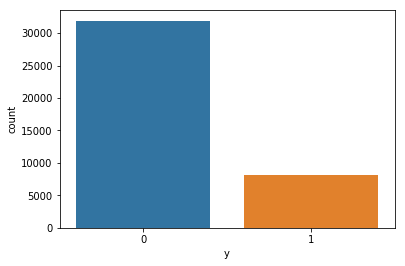

In [5]:
sns.countplot(x = 'y', data = train_data)

So, there are 100 features available to classify the y variable. The y variable is 0 or 1, most likely a yes or no. I can tell that most of the features are integers, with some categorical variables--like days of the week and countries etc. I can also tell that some of the features are going to need to be cleaned. (There is a wed instead of Wednesday and some mispelled days of the week for example)

The next step is to concatenate the training and test data, so we can properly clean it. Anything that I'm going to do with the data, I want to make sure that it is homogenious throughout the entire dataset. I'm also going to remove the dependent variable at this point.

In [6]:
#Remove the dependent variable from the training data
y = train_data['y']
train_data.drop('y', axis = 1, inplace = True)

#Concatenate the train and test data for cleaning and preprocessing
data = pd.concat([train_data, test_data], ignore_index = True)

#Verify the dimensions of the new dataframe
print(data.shape)


(50000, 100)


Good! We now have a dataframe with 50,000 rows and 100 features. The concatenation will allow us to later separate the data set back into a training and test set, using the proper indexing. (i.e. rows 0-39999 for training and 40,000-49,999 for test)

Let's now get a better idea at how much missing data are in the data set and the data types available.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 100 columns):
x0     49986 non-null float64
x1     49988 non-null float64
x2     49991 non-null float64
x3     49987 non-null float64
x4     49992 non-null float64
x5     49989 non-null float64
x6     49989 non-null float64
x7     49987 non-null float64
x8     49993 non-null float64
x9     49991 non-null float64
x10    49989 non-null float64
x11    49991 non-null float64
x12    49988 non-null float64
x13    49983 non-null float64
x14    49995 non-null float64
x15    49991 non-null float64
x16    49991 non-null float64
x17    49987 non-null float64
x18    49985 non-null float64
x19    49991 non-null float64
x20    49993 non-null float64
x21    49985 non-null float64
x22    49993 non-null float64
x23    49991 non-null float64
x24    49984 non-null float64
x25    49989 non-null float64
x26    49989 non-null float64
x27    49991 non-null float64
x28    49988 non-null float64
x29    49994 non-nul

It looks like that there is missing data in every feature. All of the features that are of the float data type most likely can replaced with the mean of that column. While the object columns are most likely the categorical variables, but it is a good idea to double check. Also, all of the object type features will most likely have to be dealt with on a case by case basis so we will have investigate how to deal with the missing data in these columns.

Features that are of the object data type are:
* x34
* x35
* x41
* x45
* x68
* x93

In [8]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,83.812330,-0.122672,65.391785,6.323478,-18.511031,2.122648,0.319472,7.650422,7.713315,2.789856,3.161937,0.314606,-2.337769,0.346473,-0.034445,6.846460,-1.432359,-2.201084,-3.354706,-14.928499,-0.508166,18.000683,-7.417965,0.630054,-4.637193,-44.558764,11.845979,10.375184,-3.198000,-1.386096,9.219494,11.276351,-10.490478,-4.955304,Honda,wed,0.912923,1.447599,7.223553,6.345453,-12.853527,$229.47,-73.696118,-2.739030,23.206414,0.0%,-7.312450,4.036468,-1.269211,15.902179,25.264524,-19.944331,-8.155119,0.518441,-3.452840,3.477219,5.028244,-0.766853,0.970404,-6.553208,-1.694899,-37.704064,-8.675090,-16.294499,-1.664874,-2.099760,-0.223206,-2.428459,July,51.746057,34.344297,44.278620,-3.272041,-31.271870,-12.342707,-24.727017,-3.950582,-28.817173,-2.383631,54.853290,-21.780661,-2.542505,-5.802268,-56.498694,-9.580207,12.248465,7.674024,0.050937,5.913765,1.970939,-144.208496,5.482352,12.211997,asia,-3.201565,-9.837196,-21.092011,4.671140,0.588994,-11.417083
1,-0.445312,-0.436077,12.981759,30.716674,-34.981679,-16.712862,0.530105,8.740222,56.044533,0.075118,-37.992717,-0.165275,-3.566991,-0.509367,2.810061,-5.014334,-0.248782,3.993480,2.023831,-11.334563,-0.882649,-20.426731,-4.132525,-0.755783,-3.195466,27.074335,-0.122106,-19.731409,-0.587150,0.576996,5.362257,-18.287779,11.000913,-4.464928,Honda,wednesday,-1.909344,-22.820981,1.659441,1.335120,21.662360,$213.9,161.950929,14.230611,-170.533210,-0.0%,-1.900118,33.197063,0.669210,-17.165298,14.336000,-6.874649,-3.768920,-21.925943,2.834963,-6.932305,-11.479294,-4.539812,-1.717179,2.649737,0.940187,20.754071,-8.693321,-32.817709,-1.120819,8.802850,1.171086,3.023245,Jun,-220.595454,-2.385381,8.773979,-3.960816,-6.953864,-12.121296,13.857537,-23.018404,27.170559,-0.024138,-42.196071,8.335470,5.435904,-7.922957,77.412079,-5.405357,-4.513079,-2.398428,1.761859,-2.619810,-9.045592,148.348086,-6.083035,-5.098374,asia,5.433036,91.724841,4.305371,4.329130,0.371513,8.474528
2,82.927148,0.075277,-29.096012,-20.176841,10.109713,-45.994005,0.618132,7.757838,-69.749060,-1.561335,116.410969,0.192342,-7.645987,0.965640,1.074688,-3.301405,1.750239,7.658523,-3.546696,-18.506079,-0.614946,47.179031,5.215522,1.347929,0.744635,-31.950503,-4.809379,-27.861889,-0.054064,-1.557694,14.415605,3.122563,-0.635359,-10.421105,volkswagon,thurday,-3.131930,10.095960,-0.690880,2.504871,-4.413666,$2207.13,-105.242685,-7.087897,-81.760391,-0.02%,4.915974,-6.845058,-0.228783,-38.756694,11.879903,-71.294059,-2.889067,17.590918,2.893195,-10.295296,22.774447,-10.388426,-3.399829,-4.831446,17.547855,42.527355,-0.549690,24.086445,1.775456,10.185312,2.599926,-1.638474,Aug,123.476657,19.379312,-49.483866,26.352788,40.813441,19.715767,17.466146,-1.239946,-78.163037,-0.021548,-10.996892,40.412330,6.621187,-3.107994,23.844594,-7.680864,43.118893,7.351277,-0.375599,-8.408146,6.285944,-76.239072,0.200787,-7.174907,asia,2.595005,-14.630603,-3.743052,-14.820376,-2.366675,2.613091
3,370.736586,-0.263338,-75.273905,-21.765844,-72.478339,-8.701108,0.332586,2.769763,-35.815423,5.230400,126.279854,-0.120964,-4.147042,-0.560841,1.196674,0.094986,1.097013,-2.590958,5.693419,-41.960069,-0.161400,42.600594,-3.005460,1.021954,-2.027826,-12.732195,-8.854023,-30.366066,12.783482,1.943701,4.834265,-1.183167,0.671143,-5.032338,volkswagon,thurday,-4.322898,0.317175,-4.903652,4.701032,-45.327546,$82.09,-90.507566,-20.113745,-143.896780,-0.0%,-5.688367,32.806852,-1.695647,12.248845,-2.186258,32.133978,-7.229061,3.083700,0.477472,-1.552590,-0.791415,-23.025946,-3.282514,1.798865,2.303376,6.390344,-7.078124,-12.500280,0.489675,5.578700,1.687373,-5.466455,July,-86.0398

x34, x35, x 68, and x93 are going to be categorical variables. While x41 and x45 are actually going to be integers. x41 is a dollar amount, we will need to remove the dolar signs and change it to an integer, while x45 is a percentage with both positive and negative values and we will need to remove the % and change it to an integer.

Before we go through the categorical variables, we should deal with the missing data of the float data type. Let's look at some overall statistics for each variable to make sure that mean would be a good way to replace missing data. I will also see if there are correlations between features, this may be a good idea if the data may be more sequential. I will then deal with the categorical variables individually.

In [9]:
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99
count,49986.000000,49988.000000,49991.000000,49987.000000,49992.000000,49989.000000,49989.000000,49987.000000,49993.000000,49991.000000,49989.000000,49991.000000,49988.000000,49983.000000,49995.000000,49991.000000,49991.000000,49987.000000,49985.000000,49991.000000,49993.000000,49985.000000,49993.000000,49991.000000,49984.000000,49989.000000,49989.000000,49991.000000,49988.000000,49994.000000,49995.000000,49990.000000,49993.000000,49988.000000,49991.000000,49994.000000,49994.000000,49990.000000,49992.000000,49985.000000,49998.000000,49995.000000,49989.000000,49994.000000,49986.000000,49994.000000,49993.000000,49987.000000,49989.000000,49994.000000,49994.000000,49983.000000,49988.000000,49990.000000,49990.000000,49989.000000,49986.000000,49991.000000,49984.000000,49985.000000,49994.000000,49986.000000,49989.000000,49990.000000,49986.000000,49994.000000,49994.000000,49990.000000,49987.000000,49990.000000,49988.000000,49989.000000,49988.000000,49990.000000,49990.000000,49991.000000,49994.000000,49990.000000,49994.000000,49997.000000,49985.000000,49988.000000,49991.000000,49994.000000,49987.000000,49992.000000,49995.000000,49992.000000,49988.000000,49991.000000,49983.000000,49987.000000,49993.000000,49985.000000
mean,22.927160,-0.058769,1.544536,-0.818440,0.313804,-0.863370,0.000880,-0.028259,-7.872697,-0.058154,7.785760,0.001072,-1.296566,-0.000186,-0.000775,0.019706,-0.006673,-0.029343,0.821213,0.136125,0.114401,4.025462,-1.014096,-0.004890,0.021299,0.248563,0.010342,9.971177,-0.021684,0.003519,-0.065636,0.039318,0.027578,-2.002411,0.003421,3.559693,0.001566,0.016575,1.680695,-2.009189,-0.005600,-35.237395,0.011512,0.005489,0.019048,0.010248,4.261589,-7.040462,-0.004704,0.084520,-0.022175,0.105216,-0.535484,-0.013845,-0.451108,-0.010006,0.018566,0.052183,-0.042233,-3.387042,0.000190,-0.044697,-0.107260,-0.017499,-16.636283,6.687591,0.193323,-3.072530,-4.710734,0.111556,5.247614,0.023221,-0.170413,-0.717070,1.500672,-0.035955,-0.006901,0.008267,1.922819,-0.010682,-6.156015,0.025649,0.008696,0.012576,0.048572,-13.823563,0.004953,0.018006,-0.036068,-0.027905,-0.475170,-1.058265,0.005524,0.339263
std,107.964201,0.277365,36.494334,16.739482,40.990525,21.215947,0.742564,6.636588,35.449144,6.264077,41.944628,0.287067,5.193220,0.816439,1.740590,9.738278,1.288192,9.844475,3.310308,32.624246,0.592916,21.889522,20.576687,1.252085,3.845252,37.384236,7.916238,42.104443,3.932967,1.007048,8.204574,9.428351,8.859355,10.390151,3.447460,23.982588,3.661765,3.303753,30.519912,95.084644,14.700616,142.111236,4.490848,27.276368,2.834281,17.603094,22.480209,39.420231,7.027088,13.955076,2.644406,9.407974,10.354601,9.419764,3.160769,4.583559,6.864536,36.128256,7.910808,18.101189,1.691130,9.779504,1.803165,3.476350,148.143201,36.221866,37.301350,15.456880,25.434445,15.160755,34.396888,9.735687,38.974256,4.043489,31.040739,14.360941,5.320486,9.138847,41.868225,4.622831,31.215260,6.428942,3.069849,9.859040,9.853225,152.802095,5.002489,6.467357,5.641379,32.334714,13.253572,7.663491,1.018896,8.560024
min,-413.886484,-1.177868,-155.506382,-72.148195,-154.979397,-85.536249,-2.882761,-25.483865,-145.002565,-24.544850,-176.261585,-1.149737,-22.582317,-3.478880,-7.177789,-39.896843,-5.614824,-38.599291,-12.517094,-132.353488,-2.627729,-89.274548,-88.267737,-6.219531,-15.108879,-147.647204,-36.185375,-166.237363,-16.004989,-4.247852,-36.166630,-38.970806,-37.058259,-47.939957,-13.977415,-96.820049,-14.819566,-12.811452,-124.764576,-477.626935,-63.733319,-689.090115,-18.535893,-113.327074,-12.198618,-74.834761,-87.376737,-177.338012,-27.706073,-53.040172,-10.624264,-42.355826,-44.341111,-42.994039,-15.6706

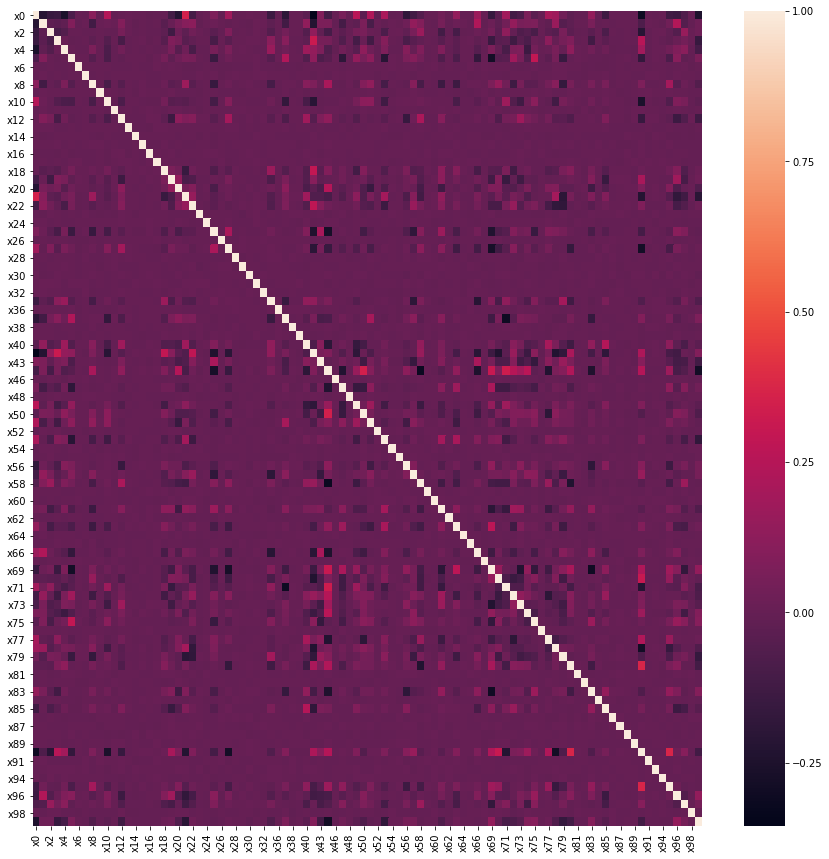

In [10]:
fig1 = plt.subplots(figsize = (15,15))
sns.heatmap(data.corr())

Okay, there is some features that are slightly correlated, but it is actually not horrible. Since there are no highly correlated features, perhaps Logistic Regression would work well. For now let's replace the missing data with the mean. Later if the model is not doing a good job we could then consider other options--like backfilling or a rolling average if necessary, or in the case of Logistic regression remove some outliers.

In [11]:
for i in range(0, 100):
    if data.iloc[:, i].dtypes == 'float64':
        data.iloc[:, i].fillna(value = np.mean(data.iloc[:, i]), inplace = True, downcast = 'float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 100 columns):
x0     50000 non-null float64
x1     50000 non-null float64
x2     50000 non-null float64
x3     50000 non-null float64
x4     50000 non-null float64
x5     50000 non-null float64
x6     50000 non-null float64
x7     50000 non-null float64
x8     50000 non-null float64
x9     50000 non-null float64
x10    50000 non-null float64
x11    50000 non-null float64
x12    50000 non-null float64
x13    50000 non-null float64
x14    50000 non-null float64
x15    50000 non-null float64
x16    50000 non-null float64
x17    50000 non-null float64
x18    50000 non-null float64
x19    50000 non-null float64
x20    50000 non-null float64
x21    50000 non-null float64
x22    50000 non-null float64
x23    50000 non-null float64
x24    50000 non-null float64
x25    50000 non-null float64
x26    50000 non-null float64
x27    50000 non-null float64
x28    50000 non-null float64
x29    50000 non-nul

In [12]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,83.812330,-0.122672,65.391785,6.323478,-18.511031,2.122648,0.319472,7.650422,7.713315,2.789856,3.161937,0.314606,-2.337769,0.346473,-0.034445,6.846460,-1.432359,-2.201084,-3.354706,-14.928499,-0.508166,18.000683,-7.417965,0.630054,-4.637193,-44.558764,11.845979,10.375184,-3.198000,-1.386096,9.219494,11.276351,-10.490478,-4.955304,Honda,wed,0.912923,1.447599,7.223553,6.345453,-12.853527,$229.47,-73.696118,-2.739030,23.206414,0.0%,-7.312450,4.036468,-1.269211,15.902179,25.264524,-19.944331,-8.155119,0.518441,-3.452840,3.477219,5.028244,-0.766853,0.970404,-6.553208,-1.694899,-37.704064,-8.675090,-16.294499,-1.664874,-2.099760,-0.223206,-2.428459,July,51.746057,34.344297,44.278620,-3.272041,-31.271870,-12.342707,-24.727017,-3.950582,-28.817173,-2.383631,54.853290,-21.780661,-2.542505,-5.802268,-56.498694,-9.580207,12.248465,7.674024,0.050937,5.913765,1.970939,-144.208496,5.482352,12.211997,asia,-3.201565,-9.837196,-21.092011,4.671140,0.588994,-11.417083
1,-0.445312,-0.436077,12.981759,30.716674,-34.981679,-16.712862,0.530105,8.740222,56.044533,0.075118,-37.992717,-0.165275,-3.566991,-0.509367,2.810061,-5.014334,-0.248782,3.993480,2.023831,-11.334563,-0.882649,-20.426731,-4.132525,-0.755783,-3.195466,27.074335,-0.122106,-19.731409,-0.587150,0.576996,5.362257,-18.287779,11.000913,-4.464928,Honda,wednesday,-1.909344,-22.820981,1.659441,1.335120,21.662360,$213.9,161.950929,14.230611,-170.533210,-0.0%,-1.900118,33.197063,0.669210,-17.165298,14.336000,-6.874649,-3.768920,-21.925943,2.834963,-6.932305,-11.479294,-4.539812,-1.717179,2.649737,0.940187,20.754071,-8.693321,-32.817709,-1.120819,8.802850,1.171086,3.023245,Jun,-220.595454,-2.385381,8.773979,-3.960816,-6.953864,-12.121296,13.857537,-23.018404,27.170559,-0.024138,-42.196071,8.335470,5.435904,-7.922957,77.412079,-5.405357,-4.513079,-2.398428,1.761859,-2.619810,-9.045592,148.348086,-6.083035,-5.098374,asia,5.433036,91.724841,4.305371,4.329130,0.371513,8.474528
2,82.927148,0.075277,-29.096012,-20.176841,10.109713,-45.994005,0.618132,7.757838,-69.749060,-1.561335,116.410969,0.192342,-7.645987,0.965640,1.074688,-3.301405,1.750239,7.658523,-3.546696,-18.506079,-0.614946,47.179031,5.215522,1.347929,0.744635,-31.950503,-4.809379,-27.861889,-0.054064,-1.557694,14.415605,3.122563,-0.635359,-10.421105,volkswagon,thurday,-3.131930,10.095960,-0.690880,2.504871,-4.413666,$2207.13,-105.242685,-7.087897,-81.760391,-0.02%,4.915974,-6.845058,-0.228783,-38.756694,11.879903,-71.294059,-2.889067,17.590918,2.893195,-10.295296,22.774447,-10.388426,-3.399829,-4.831446,17.547855,42.527355,-0.549690,24.086445,1.775456,10.185312,2.599926,-1.638474,Aug,123.476657,19.379312,-49.483866,26.352788,40.813441,19.715767,17.466146,-1.239946,-78.163037,-0.021548,-10.996892,40.412330,6.621187,-3.107994,23.844594,-7.680864,43.118893,7.351277,-0.375599,-8.408146,6.285944,-76.239072,0.200787,-7.174907,asia,2.595005,-14.630603,-3.743052,-14.820376,-2.366675,2.613091
3,370.736586,-0.263338,-75.273905,-21.765844,-72.478339,-8.701108,0.332586,2.769763,-35.815423,5.230400,126.279854,-0.120964,-4.147042,-0.560841,1.196674,0.094986,1.097013,-2.590958,5.693419,-41.960069,-0.161400,42.600594,-3.005460,1.021954,-2.027826,-12.732195,-8.854023,-30.366066,12.783482,1.943701,4.834265,-1.183167,0.671143,-5.032338,volkswagon,thurday,-4.322898,0.317175,-4.903652,4.701032,-45.327546,$82.09,-90.507566,-20.113745,-143.896780,-0.0%,-5.688367,32.806852,-1.695647,12.248845,-2.186258,32.133978,-7.229061,3.083700,0.477472,-1.552590,-0.791415,-23.025946,-3.282514,1.798865,2.303376,6.390344,-7.078124,-12.500280,0.489675,5.578700,1.687373,-5.466455,July,-86.0398

All of the features that are of type float have now been filled. Now it is time to fill and correct the object features.

Let's start with x34.

In [13]:
data['x34'].unique()

array(['Honda', 'volkswagon', 'ford', 'Toyota', 'bmw', 'chrystler',
       'tesla', 'nissan', nan, 'mercades', 'chevrolet'], dtype=object)

So, there are 10 different categories of car makers here. Let's correct them to be capitalized because they are companies and also fix the spelling of 'chrystler' to Chrysler. Also, then we will replace the nan with the most common car maker.

In [14]:
car_maker = {'volkswagon': 'Volkswagen', 'ford': 'Ford', 'bmw': 'BMW',
           'chrystler': 'Chrysler', 'tesla': 'Tesla', 'nissan':'Nissan',
           'mercades':'Mercedes', 'chevrolet':'Chevrolet'}
data['x34'].replace(car_maker, inplace = True)
data['x34'].unique()

array(['Honda', 'Volkswagen', 'Ford', 'Toyota', 'BMW', 'Chrysler',
       'Tesla', 'Nissan', nan, 'Mercedes', 'Chevrolet'], dtype=object)

In [15]:
#to get the most used car maker
data['x34'].describe()

count          49991
unique            10
top       Volkswagen
freq           15689
Name: x34, dtype: object

In [16]:
data['x34'].fillna(value = 'Volkswagen', inplace = True)
data['x34'].describe()

count          50000
unique            10
top       Volkswagen
freq           15698
Name: x34, dtype: object

This is now taken care of!

Let us now move onto x35. 

In [17]:
data['x35'].unique()

array(['wed', 'wednesday', 'thurday', 'thur', 'friday', 'tuesday',
       'monday', 'fri', nan], dtype=object)

This is a feature of the days of the week. Let's use the same approach that we took for the car maker feature.

In [18]:
days_of_week = {'wed': 'Wednesday', 'wednesday': 'Wednesday', 'thurday': 'Thursday',
               'thur': 'Thursday', 'friday': 'Friday', 'tuesday': 'Tuesday',
               'monday': 'Monday', 'fri': 'Friday'}
data['x35'].replace(days_of_week, inplace = True)
data['x35'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Tuesday', 'Monday', nan],
      dtype=object)

In [19]:
data['x35'].describe()

count         49987
unique            5
top       Wednesday
freq          25954
Name: x35, dtype: object

In [20]:
data['x35'].fillna(value = 'Wednesday', inplace = True)
data['x35'].describe()

count         50000
unique            5
top       Wednesday
freq          25967
Name: x35, dtype: object

That one is now done! Let's work on x41 next!

In [21]:
data['x41'].unique()

array(['$229.47', '$213.9', '$2207.13', ..., '$1196.18', '$-943.27',
       '$1922.49'], dtype=object)

This feature is in USD. Let's just change this to a float value, I will remove the $ and change the data type.

In [22]:
data['x41'].replace('[\$]', '', regex = True, inplace = True)
data['x41']= pd.to_numeric(data['x41'], downcast = 'float')
data['x41'].describe()

count    49994.000000
mean         0.010794
std        999.999390
min      -4496.459961
25%       -669.922516
50%          5.610000
75%        676.057526
max       4327.529785
Name: x41, dtype: float64

Let's handle this missing data by replacing it with the mean, which is 0.010794.

In [23]:
data['x41'].fillna(value = 0.010794, inplace = True)
data['x41'].describe()

count    50000.000000
mean         0.010794
std        999.939392
min      -4496.459961
25%       -669.817505
50%          5.470000
75%        675.937500
max       4327.529785
Name: x41, dtype: float64

In [24]:
data['x45'].unique()

array(['0.0%', '-0.0%', '-0.02%', '0.01%', '0.02%', '0.03%', '-0.01%',
       '-0.03%', '-0.04%', '0.04%', nan], dtype=object)

Let's do the same exact thing that we did previously with x41.

In [25]:
data['x45'].replace('[\%]', '', regex = True, inplace = True)
data['x45'] = pd.to_numeric(data['x45'], downcast = 'float')
data['x45'].describe()

count    49993.000000
mean        -0.000011
std          0.010416
min         -0.040000
25%         -0.010000
50%          0.000000
75%          0.010000
max          0.040000
Name: x45, dtype: float64

In [26]:
data['x45'].fillna(value = -0.000011, inplace = True)
data['x45'].describe()

count    50000.000000
mean        -0.000011
std          0.010415
min         -0.040000
25%         -0.010000
50%          0.000000
75%          0.010000
max          0.040000
Name: x45, dtype: float64

Now let's move on to x68.

In [27]:
data['x68'].unique()

array(['July', 'Jun', 'Aug', 'sept.', 'May', 'Apr', 'Oct', 'Mar', 'Dev',
       'Nov', nan, 'Feb', 'January'], dtype=object)

These are months. Let's stick with the three letter abbreviations for months. That means we need to fix some of the months that are currently there.

In [28]:
months = {'July': 'Jul', 'sept.': 'Sep', 'Dev': 'Dec', 'January': 'Jan'}
data['x68'].replace(months, inplace = True)
data['x68'].unique()

array(['Jul', 'Jun', 'Aug', 'Sep', 'May', 'Apr', 'Oct', 'Mar', 'Dec',
       'Nov', nan, 'Feb', 'Jan'], dtype=object)

We can replace the missing values with the most common month.

In [29]:
data['x68'].describe()

count     49989
unique       12
top         Jul
freq      13855
Name: x68, dtype: object

In [30]:
data['x68'].fillna(value = 'Jul', inplace = True)
data['x68'].describe()

count     50000
unique       12
top         Jul
freq      13866
Name: x68, dtype: object

Finally, last but not lease is x93!

In [31]:
data['x93'].unique()

array(['asia', 'america', 'euorpe', nan], dtype=object)

For the sake of consistency, we will replace these with the proper capitalization and fix the spelling of Europe. Also, we can then see how many missing values there are, and perhaps just replace it with the most common.

In [32]:
continents = {'asia': 'Asia', 'america': 'America', 'euorpe':'Europe'}
data['x93'].replace(continents, inplace = True)
data['x93'].unique()

array(['Asia', 'America', 'Europe', nan], dtype=object)

In [33]:
data['x93'].describe()

count     49992
unique        3
top        Asia
freq      44284
Name: x93, dtype: object

I thought about filling in the missing values of the continent, based on the car manufacturer's location. However, when looking at the manufacturer's that were in the data, Volkswagen, which is European, was the top model. This does not match the top continent as being Asian. So, it would not make sense to replace the missing values here with the location of the car maker. I will just replace the missing data with Asia, as that is the highest frequency category in this dataset--and there are only 8 missing.

In [34]:
data['x93'].fillna(value = 'Asia', inplace = True)
data['x93'].describe()

count     50000
unique        3
top        Asia
freq      44292
Name: x93, dtype: object

Now let's double check to see if we have handled all of the missing data.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 100 columns):
x0     50000 non-null float64
x1     50000 non-null float64
x2     50000 non-null float64
x3     50000 non-null float64
x4     50000 non-null float64
x5     50000 non-null float64
x6     50000 non-null float64
x7     50000 non-null float64
x8     50000 non-null float64
x9     50000 non-null float64
x10    50000 non-null float64
x11    50000 non-null float64
x12    50000 non-null float64
x13    50000 non-null float64
x14    50000 non-null float64
x15    50000 non-null float64
x16    50000 non-null float64
x17    50000 non-null float64
x18    50000 non-null float64
x19    50000 non-null float64
x20    50000 non-null float64
x21    50000 non-null float64
x22    50000 non-null float64
x23    50000 non-null float64
x24    50000 non-null float64
x25    50000 non-null float64
x26    50000 non-null float64
x27    50000 non-null float64
x28    50000 non-null float64
x29    50000 non-nul

Awesome there are no more missing values in our data. The next step is I need to change the features that are of data type object into a categorical data type. I will then standardize all of the float features and one hot encode the categorical features.

In [36]:
from sklearn.preprocessing import StandardScaler

data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 100 columns):
x0     50000 non-null float64
x1     50000 non-null float64
x2     50000 non-null float64
x3     50000 non-null float64
x4     50000 non-null float64
x5     50000 non-null float64
x6     50000 non-null float64
x7     50000 non-null float64
x8     50000 non-null float64
x9     50000 non-null float64
x10    50000 non-null float64
x11    50000 non-null float64
x12    50000 non-null float64
x13    50000 non-null float64
x14    50000 non-null float64
x15    50000 non-null float64
x16    50000 non-null float64
x17    50000 non-null float64
x18    50000 non-null float64
x19    50000 non-null float64
x20    50000 non-null float64
x21    50000 non-null float64
x22    50000 non-null float64
x23    50000 non-null float64
x24    50000 non-null float64
x25    50000 non-null float64
x26    50000 non-null float64
x27    50000 non-null float64
x28    50000 non-null float64
x29    50000 non-nul

In [37]:
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 126 entries, x0 to x93_Europe
dtypes: float32(2), float64(94), uint8(30)
memory usage: 37.7 MB


In [38]:
scaled_data = StandardScaler().fit_transform(data)

In [39]:
train_df = scaled_data[0:40000, :]
test_df = scaled_data[40000:, :]

Since the data is now cleaned and standardized, I'm going to remove the test data back out. For purposes of model refinement, I'm going to make a training and development data set out of a randomly sampled portion of the data. For this, I would like to use 25% of the data. Since there are a good amount of columns, I want to make sure that I do not overfit my data. One way to get a good idea at how my data is going to perform on the test set is to use a little bit larger dev. set.

In [40]:
print(train_df.shape)
print(test_df.shape)

(40000, 126)
(10000, 126)


Now I am going to randomly split the training data into the training and development sets for model building and refinement. I'm going to investigate 2 different models to see which ones will work.

In [41]:
from sklearn.model_selection import train_test_split

X_tr, X_dev, y_tr, y_dev = train_test_split(train_df, y, test_size = 0.25, random_state = 4)


In order to try to get the best model performance on the test set, I have made a dev set of 25% in an attempt to validate the model on a lot of data that hasn't been seen. Since the y variable is so uneven, I chose a little bit larger dev set than normal, especially for this many rows in a dataset, to try and combat this problem.

The first model I am going to test is going to be logistic regression.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
#quick model test
log_res = LogisticRegression(penalty = 'l2', random_state = 4)
log_res.fit(X_tr, y_tr)

log_auc = roc_auc_score(y_dev, log_res.predict(X_dev))

In [41]:
print(log_auc)

0.789225169399733


Out of all of the other models that I tried, this is actuallly not to bad. While this model is not the best, perhaps it can get a little better with some parameter tuning. Again in order for the most accurate results, I am going to do cross-validation with a Randomized Parameter search. Furthermore, one of the parameters that I am going to include is two different types of regularization.

In [42]:
from sklearn.model_selection import RandomizedSearchCV

log_params = {'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 1, 2.5, 5, 10], 'max_iter': [100, 500, 1000]}

log_rs_clf = LogisticRegression()

log_randomsearch = RandomizedSearchCV(estimator = log_rs_clf, param_distributions = log_params, n_iter = 36,
                                     cv = 5, scoring = 'roc_auc', verbose = 2, random_state = 4, n_jobs = 3)
log_randomsearch.fit(X_tr, y_tr)

print(log_randomsearch.best_params_)
log_randomsearch_auc = roc_auc_score(y_dev, log_randomsearch.predict(X_dev))
print(log_randomsearch_auc)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 25.9min
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed: 35.2min finished


{'penalty': 'l1', 'max_iter': 500, 'C': 0.1}
0.7892686213758533


So, the model only got marginally better with the tuning. I actually tried and even lower C level, but at that point the model performance started to decrease. Now let's plot the ROC AUC curve to get a little bit better of an idea.

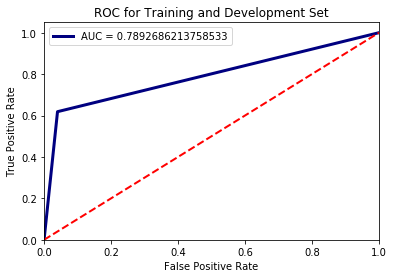

In [43]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_dev, log_randomsearch.predict(X_dev))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color = 'navy', lw = 3, label = 'AUC = '+str(log_randomsearch_auc))
plt.title('ROC for Training and Development Set')
plt.plot([0,1], [0,1], color = 'red', lw = 2, linestyle = '--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'upper left')
plt.show()

In addition to the ROC AUC, we can also take a look at the confusion matrix and calculate the precision and recall. To do so, I will build a quick function.

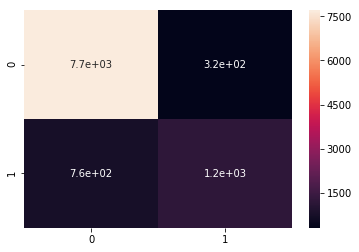

In [48]:
from sklearn.metrics import confusion_matrix

log_reg_con_matrix = confusion_matrix(y_dev, log_randomsearch.predict(X_dev))

sns.heatmap(log_reg_con_matrix, annot = True)

In [73]:
def output_precision_recall(confusion_matrix):
    prec = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
    recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
    f1 = 2*((prec*recall)/(prec+recall))
    return prec, recall, f1

log_reg = output_precision_recall(log_reg_con_matrix)
print(log_reg)  

(0.7918552036199095, 0.6186868686868687, 0.6946413382478026)


You can see that our model does much better on precision than it does recall. I also calculated the F1 score to get a good idea as well. If our model does better at precision than recall this means that it is likely having trouble with prediction and generalizeing to the dev set. Perhaps, in this case model performance could be improved slightly by including a little bit less data in the training set, and more dev. set.

Here I am going to also plot the Precision-Recall Curve, which can show how fast a change in the threshold will decrease precision while increasing recall.

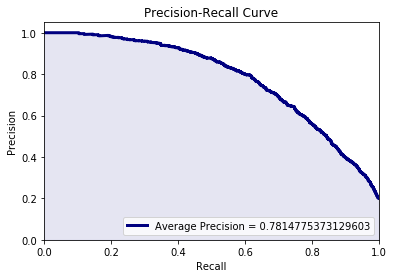

In [56]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresh= precision_recall_curve(y_dev, log_randomsearch.predict_proba(X_dev)[:,1])
ave_prec = average_precision_score(y_dev, log_randomsearch.predict_proba(X_dev)[:,1])

plt.plot(recall, precision, color = 'navy', lw = 3, label = 'Average Precision = '+str(ave_prec))
plt.fill_between(recall, precision, color = 'navy', alpha = 0.1)
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower right')
plt.show()

I am now going to save the model as a pickle file for later use. After that, according to the instructions, I will then reload the model and then make predictions on the test set. These predictions will then be saved as the file 'results1.csv' containing only the probabilities that each test set prediction=1.

In [44]:
import pickle

filename = 'log_reg_model.pickle'
pickle.dump(log_randomsearch, open(filename, 'wb'))

In [44]:
#open model for prediction
prediction_mod = pickle.load(open(filename, 'rb'))

preds_1 = prediction_mod.predict_proba(test_df)[:,1]
print(preds_1)


[0.06142578 0.02793876 0.16178292 ... 0.0593323  0.8508477  0.0168962 ]


In [46]:
np.savetxt('results1.csv', preds_1, delimiter = ',')

It is now time for the second model! I chose a Support Vector Machine in this case. Since the logistic regression, and other models were having trouble fitting the data, I decided to try this non-linear classifier to see how it would work. Usually when linearity is not present, a complicated decision boundary must be obtained and SVMs are good at acheiving this in a fraction of the time it takes Neural Networks.

In [48]:
from sklearn.svm import SVC

svc = SVC(gamma = 'auto', random_state = 4)
svc.fit(X_tr, y_tr)
svc_auc = roc_auc_score(y_dev, svc.predict(X_dev))
print(svc_auc)

0.9583490768029421


This acutally looks like a really good start! Let's push the optimization a little bit using the same technique as we did for logistic regression--the randomized search cross-validation.

SVC optimization: In order to ouput probabilities, sklearn's SVC class has a method that you can turn on. One needs to make sure that this probability parameter is set to True. This has the trade-off of being more computationally intensive.

In [49]:


SVC_params = {'C': [1, 10, 50, 100], 'kernel': ['rbf', 'poly', 'sigmoid']}

svc_1 = SVC(probability = True, random_state = 4, gamma = 'auto')

svc_rand = RandomizedSearchCV(estimator = svc_1, param_distributions = SVC_params, n_iter = 10, random_state = 4,
                         cv = 3, scoring = 'roc_auc', verbose = 2, n_jobs = 3)
svc_rand.fit(X_tr, y_tr)

svc_auc_rand = roc_auc_score(y_dev, svc_rand.predict(X_dev))
print(svc_auc_rand)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed: 167.5min finished


0.9646622081160734


In [50]:
print(svc_rand.best_params_)

{'kernel': 'rbf', 'C': 50}


This parameter optimization actually worked better than the previous one, giving us a 0.5% increase in the ROC AUC score. Let's plot it to check it out!

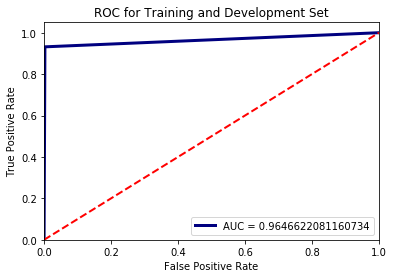

In [51]:

fpr_svm, tpr_svm, thresh_svm = roc_curve(y_dev, svc_rand.predict(X_dev))


plt.plot(fpr_svm, tpr_svm, color = 'navy', lw = 3, label = 'AUC = '+str(svc_auc_rand))
plt.title('ROC for Training and Development Set')
plt.plot([0,1], [0,1], color = 'red', lw = 2, linestyle = '--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Since this optimization took awhile to run, I want to save the model now and ouput my predictions the same way that I did for logistic regression. This file will then be named 'results2.csv'.

In [53]:
filename = 'svc_model.pickle'
pickle.dump(svc_rand, open(filename, 'wb'))

In [65]:
svc_pred = pickle.load(open(filename, 'rb'))

preds_2 = svc_pred.predict_proba(test_df)[:,1]
print(preds_2)

[1.47156948e-04 1.81906469e-03 1.40689459e-03 ... 3.95944177e-03
 9.96731916e-01 4.02257782e-05]


In [58]:
np.savetxt('results2.csv', preds_2, delimiter = ',')

Let's take a look at the confusion matrix now to get a better idea at the model performance.

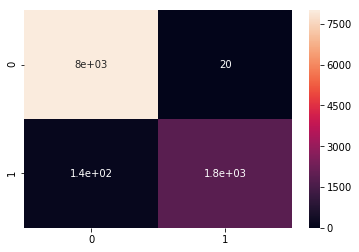

In [70]:
svc_conf_matrix = confusion_matrix(y_dev, svc_pred.predict(X_dev))

sns.heatmap(svc_conf_matrix, annot = True, vmin = 0, vmax=8000)

In [74]:
svc_prec_rec = output_precision_recall(svc_conf_matrix)
print(svc_prec_rec) 

(0.9892761394101877, 0.9318181818181818, 0.9596879063719116)


Wow, this model is very precise! With an almost 99% precision. However, the same problem that we saw with recall in logistic regression is in this model as well. I believe if we wanted to optimize it further we can play with the dev and training set sizes, maybe a little less data in the training set and more the dev set. However, this model looks very robust right now, and depending on the use case (how important are false negatives?) could start to be used.

Let's also take a look at the precision-recall curve.

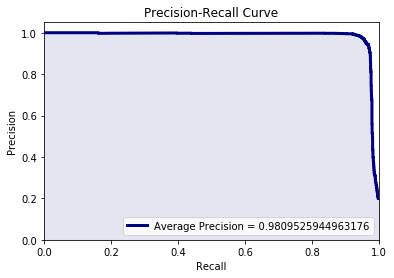

In [68]:
precision, recall, thresh= precision_recall_curve(y_dev, svc_pred.predict_proba(X_dev)[:,1])
ave_prec = average_precision_score(y_dev, svc_pred.predict_proba(X_dev)[:,1])

plt.plot(recall, precision, color = 'navy', lw = 3, label = 'Average Precision = '+str(ave_prec))
plt.fill_between(recall, precision, color = 'navy', alpha = 0.1)
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower right')
plt.show()

Overall, it is clear to see that an SVM is the way to go with this data set. If I had the resources and more time allocated a NN might also be a good model to train this set on, as it seems to have a distinct non-linearity. However, since the SVM is performing so well other methods may simply not be needed. In order to improve the SVM, one could change the ratio of the training and dev set to see how that effects the precision and recall--which may improve. Furthermore, another route could be examine the data more closely for outliers and perhaps remove them. All in all, this was a fun dataset to work with!